# Heart Faliure Prediction Using Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

#### Reading Data

In [32]:
notebook_path = os.path.abspath("HeartFailureLogisticRegression.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "Input\\heart.csv")
df = pd.read_csv(path)

In [33]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#### Data Cleaning

In [4]:
df = df.drop_duplicates()
df.duplicated().values.any()

False

In [5]:
df = df.fillna(method="ffill")
pd.isnull(df).any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

#### Data Visualization

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.2+ KB


In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

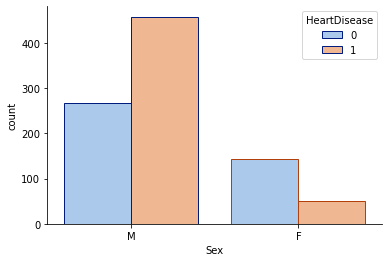

In [9]:
sns.countplot(data=df,x="Sex",hue="HeartDisease",palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
sns.despine()

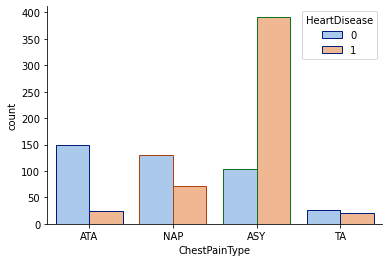

In [10]:
sns.countplot(data=df,x="ChestPainType",hue="HeartDisease",palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
sns.despine()

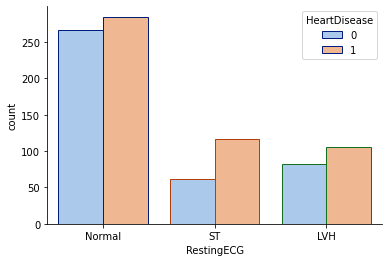

In [11]:
sns.countplot(data=df,x="RestingECG",hue="HeartDisease",palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
sns.despine()

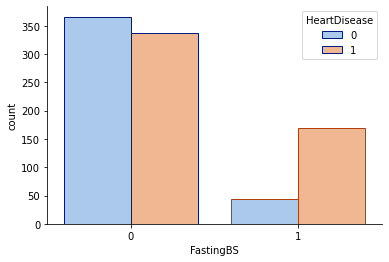

In [12]:
sns.countplot(data=df,x="FastingBS",hue="HeartDisease",palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
sns.despine()

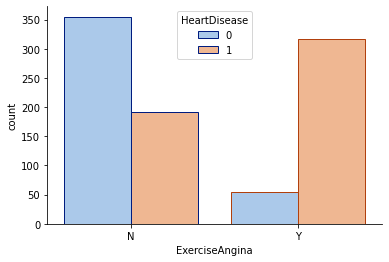

In [13]:
sns.countplot(data=df,x="ExerciseAngina",hue="HeartDisease",palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
sns.despine()

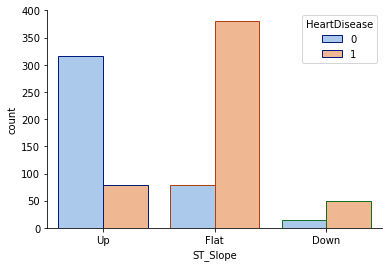

In [14]:
sns.countplot(data=df,x="ST_Slope",hue="HeartDisease",palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
sns.despine()

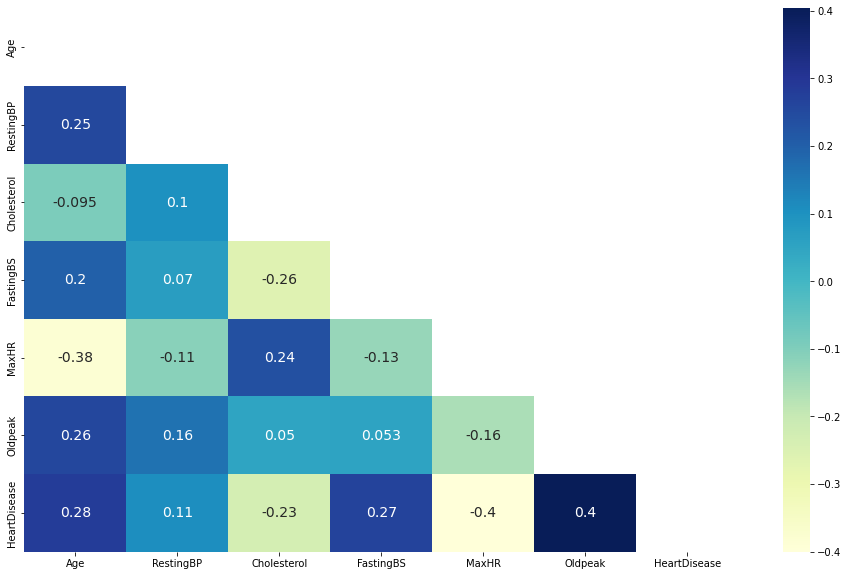

In [15]:
mask = np.zeros_like(df.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 14}, cmap="YlGnBu")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

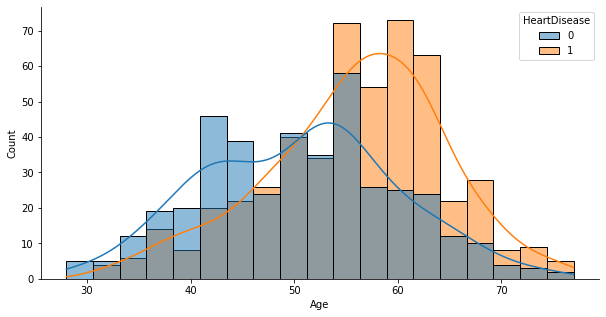

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x="Age",kde=True,hue="HeartDisease",color="r")
sns.despine()

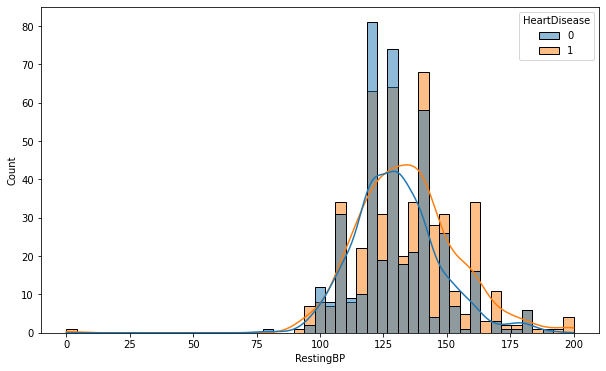

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="RestingBP",kde=True,hue="HeartDisease",color="r")
plt.show()

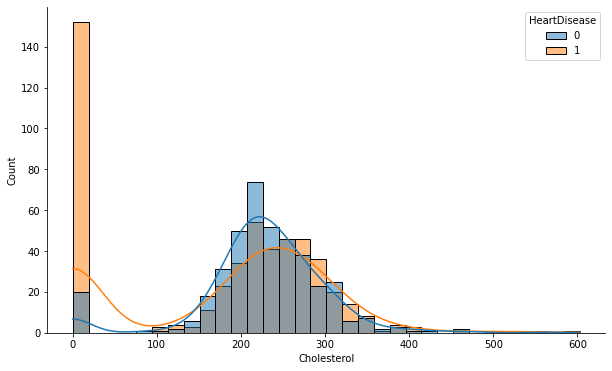

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="Cholesterol",kde=True,hue="HeartDisease")
sns.despine()

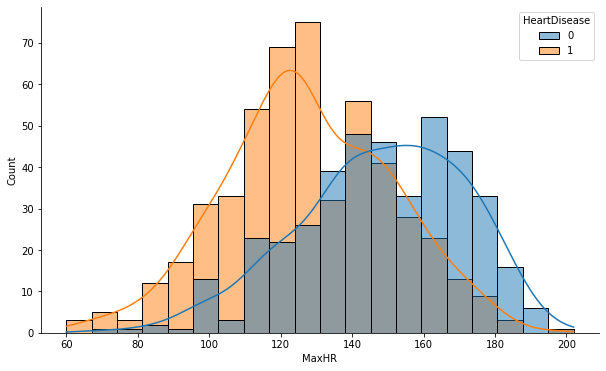

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="MaxHR",kde=True,hue="HeartDisease")
sns.despine()

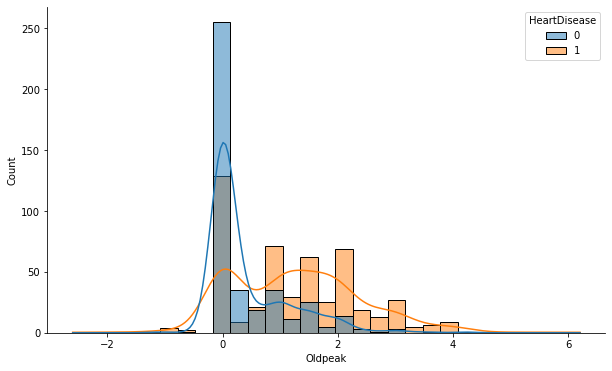

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="Oldpeak",kde=True,hue="HeartDisease")
sns.despine()

#### Data Transformation

In [21]:
cat_list = df.select_dtypes(include="object").columns.tolist()
for cat in cat_list:
    df[cat] = df[cat].apply(lambda x:cat+"_"+x)
    a = pd.get_dummies(df[cat])
    df = pd.concat([df,a],axis=1)
    df.drop(columns=cat,inplace=True)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [22]:
X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']

In [23]:
X.shape

(918, 20)

In [24]:
Y.shape

(918,)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [38]:
logreg = LogisticRegression(C=0.05,solver='lbfgs',max_iter=200,penalty='l2')
logreg.fit(x_train,y_train)

LogisticRegression(C=0.05, max_iter=200)

In [39]:
logregPredict = logreg.predict(x_test)
logregPredict

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [40]:
print("Accuracy:",accuracy_score(y_test, logregPredict))
print("Precision:",precision_score(y_test, logregPredict))
print("Recall:",recall_score(y_test, logregPredict))
print("F1 Score:",f1_score(y_test, logregPredict))

Accuracy: 0.842391304347826
Precision: 0.8482142857142857
Recall: 0.8878504672897196
F1 Score: 0.8675799086757991


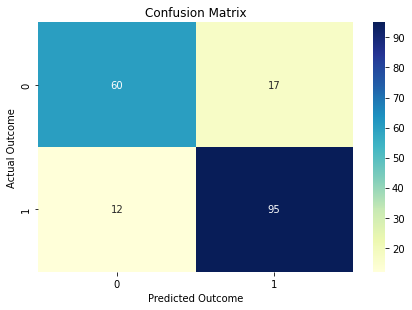

In [41]:
cnf_matrix = confusion_matrix(y_test, logregPredict)
class_names=[0,1]
fig = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')
plt.show()

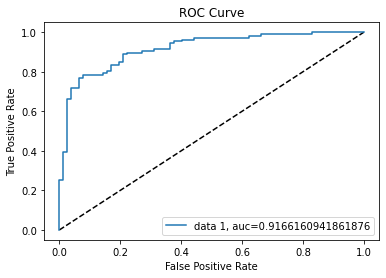

In [42]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [43]:
print(classification_report(y_test, logregPredict))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        77
           1       0.85      0.89      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184

